In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from lightgbm import LGBMClassifier

In [3]:
df=pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')
df.drop('id',axis=1,inplace=True)
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0


In [4]:
df.isna().sum().to_frame().T

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28,0


In [14]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
df['PCA1'] = pca1.fit_transform(df[['Inflight wifi service', 'Ease of Online booking']])

pca2 = PCA(n_components=1)
df['PCA2'] = pca2.fit_transform(df[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])

In [15]:
num_cols=[]
cat_cols=[]
for col in df.columns:
    if df[col].dtypes=='object':
        cat_cols.append(col)
    else:
        corr=df[col].corr(df['satisfaction'])
        if corr>0.10 and col!= 'satisfaction':
            

            num_cols.append(col)
num_cols=df[num_cols]
cat_cols=df[cat_cols]



X=pd.concat([num_cols,cat_cols],axis=1)  
y=df['satisfaction']

In [16]:

cat_attr=cat_cols.columns
num_attr=num_cols.columns

full_pip=ColumnTransformer([
    ('num',MinMaxScaler(),num_attr),
    ('cat',OrdinalEncoder(),cat_attr)
])

X=full_pip.fit_transform(X)
X_train,X_test, y_train ,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

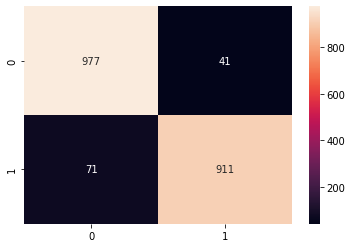

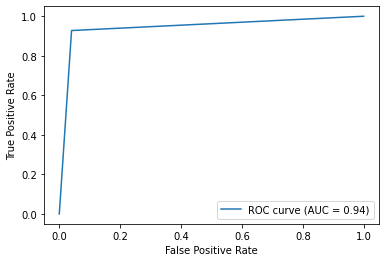

In [17]:
from sklearn import metrics
model=RandomForestClassifier(
                     )
model.fit(X_train,y_train)
predict=model.predict(X_test)
plt.figure()
sns.heatmap(confusion_matrix(y_test,predict),annot=True,fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)


NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
8/8 - 1s - loss: 0.5855 - accuracy: 0.6939 - val_loss: 0.4531 - val_accuracy: 0.7920
Epoch 2/1000
8/8 - 0s - loss: 0.4327 - accuracy: 0.8106 - val_loss: 0.4043 - val_accuracy: 0.8315
Epoch 3/1000
8/8 - 0s - loss: 0.3801 - accuracy: 0.8441 - val_loss: 0.3634 - val_accuracy: 0.8510
Epoch 4/1000
8/8 - 0s - loss: 0.3489 - accuracy: 0.8555 - val_loss: 0.3515 - val_accuracy: 0.8590
Epoch 5/1000
8/8 - 0s - loss: 0.3285 - accuracy: 0.8666 - val_loss: 0.3319 - val_accuracy: 0.8690
Epoch 6/1000
8/8 - 0s - loss: 0.3161 - accuracy: 0.8714 - val_loss: 0.3213 - val_accuracy: 0.8655
Epoch 7/1000
8/8 - 0s - loss: 0.2960 - accuracy: 0.8825 - val_loss: 0.2994 - val_accuracy: 0.8780
Epoch 8/1000
8/8 - 1s - loss: 0.2797 - accuracy: 0.8871 - val_loss: 0.2859 - val_accuracy: 0.8875
Epoch 9/1000
8/8 - 0s - loss: 0.2585 - accuracy: 0.8953 - val_loss: 0.2623 - val_accuracy: 0.8905
Epoch 10/1000
8/8 - 0s - loss: 0.2372 - accuracy: 0.9014 - val_loss: 0.2425 - val_accuracy: 0.9035
Epoch 11/1000
8/8 -

Accuracy Score:  94.50%
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1018
           1       0.96      0.93      0.94       982

    accuracy                           0.94      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.94      0.94      2000



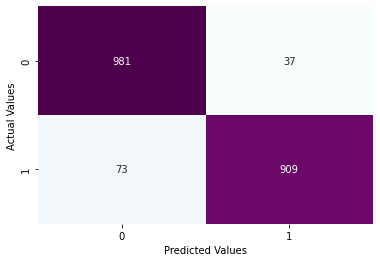

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype(int)   
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Test data


In [20]:
test_data=pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
test_data['PCA1'] = pca1.fit_transform(test_data[['Inflight wifi service', 'Ease of Online booking']])

pca2 = PCA(n_components=1)
test_data['PCA2'] = pca2.fit_transform(test_data[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])
test_x=full_pip.transform(test_data)
test_x

array([[0.24657534, 0.53978191, 0.4       , ..., 0.        , 1.        ,
        1.        ],
       [0.57534247, 0.32148627, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.60273973, 0.06199515, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.42465753, 0.11530695, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.21917808, 0.19123586, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.24657534, 0.21304523, 0.6       , ..., 1.        , 0.        ,
        1.        ]])

# Submission

In [21]:
submission=pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv')
submission['satisfaction']=model.predict(test_x)

In [22]:
submission.to_csv('submissionTensor1.csv',index=False)